(1, 1, 12, 128, 128)


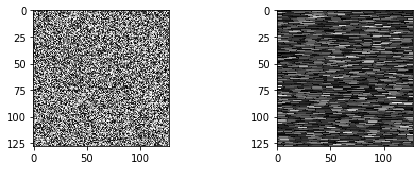

In [1]:
from pylab import imshow, show, get_cmap
from matplotlib import pyplot as plt
from skimage import filters

import numpy as np
import HIP

#%%
im = np.random.random((1,1,12,128,128))
#im = np.random.random((128,128,12,1,1))
#im = np.random.rand(128, 512)
#im = np.zeros((128,256), order='C')
#im[20:50,:] = 1
#print(im.shape)

#%%
#imS = HIP.IdentityFilter(im, 0)
#imS = HIP.Gaussian(im, [5,2,12])
kern = np.ones((1,1,7))
imS = HIP.Opener(im,kern)
print(imS.shape)

#%%
fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(im[0,0,5,:,:], cmap=get_cmap("gray"), interpolation='nearest')
ax[1].imshow(imS[0,0,5,:,:], cmap=get_cmap("gray"), interpolation='nearest')

plt.show()

#x = 1


In [2]:
import imagej
ij = imagej.init('C:/programs/fiji-win64/Fiji.app/')

# load some image data
from skimage import io
sk_img = io.imread('https://samples.fiji.sc/blobs.png')

# init clijpy to get access to the GPU
from jnius import autoclass
CLIJx = autoclass('net.haesleinhuepf.clijx.CLIJx')
clijx = CLIJx.getInstance();



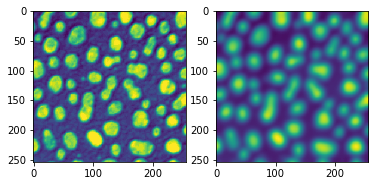

In [13]:

def clijx_pull(buffer):
    import numpy
    dims = buffer.getDimensions();
    if (len(dims) == 2):
        dims = [dims[1], dims[0]];
    else:
        dims = [dims[2], dims[1], dims[0]];
        
    numpy_image = numpy.zeros(dims);
    
    wrapped = ij.py.to_java(numpy_image);
    clijx.pullToRAI(buffer, wrapped); # see https://github.com/clij/clij-advanced-filters/blob/master/src/main/java/net/haesleinhuepf/clijx/CLIJx.java#L87
    return numpy_image


# convert and array to an ImageJ2 img:
import numpy as np
np_arr = np.array(sk_img)
ij_img = ij.py.to_java(np_arr)

# push the image to the GPU
input = clijx.push(ij_img)
# allocate memory for the result image
output = clijx.create(input)

# blur the image
clijx.blur(input, output, 5.0, 5.0, 0.0);

# pull image back from GPU
np_arr_result = clijx_pull(output);

clijx.clear();

# show the input and the result image
from matplotlib import pyplot as plt
plt.subplot(121)
plt.imshow(np_arr)
plt.subplot(122)
plt.imshow(np_arr_result)
plt.show()